# **WATER POTABILITY APP - MODEL_EXPERIMENTATION**

## Objectives

* Train and compare multiple classification models

* Optimize hyperparameters using GridSearchCV

* Interpret model decisions using SHAP values

## Inputs

* Engineered dataset: data/water_potability_engineered.csv 

## Outputs

* Trained model objects (saved in models/ directory)

* Hyperparameter tuning results (printed in notebook)

* SHAP analysis visualizations (saved as PNG)

## Additional Comments

* Benchmarks 4+ model architectures

* Includes ROC curve analysis

* Provides model explainability insights


---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [22]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [23]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [24]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads'

# Set Data Directory

### Setup and Data Preparation

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("./data/water_potability_processed.csv")

imputer = SimpleImputer(strategy='median')
X = df.drop('Potability', axis=1)
y = df['Potability']
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("\nMissing values after imputation:")
print(X_train.isna().sum())

Training set: 2620 samples
Test set: 656 samples

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


### Baseline Models

🚀 Starting model evaluation...

🔍 Evaluating Random Forest...
✅ Random Forest completed successfully
   Accuracy: 0.659, ROC AUC: 0.641
   Most important feature: ph
--------------------------------------------------
🔍 Evaluating XGBoost...


c:\Users\User\Downloads\water-potability\water-potability\.venv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\User\Downloads\water-potability\water-potability\.venv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\User\Downloads\water-potability\water-potability\.venv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\User\Downloads\water-potability\water-potability\.venv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be re

✅ XGBoost completed successfully
   Accuracy: 0.642, ROC AUC: 0.643
   Most important feature: ph
--------------------------------------------------
🔍 Evaluating SVM...
✅ SVM completed successfully
   Accuracy: 0.610, ROC AUC: 0.530
--------------------------------------------------
🔍 Evaluating Gradient Boosting...
✅ Gradient Boosting completed successfully
   Accuracy: 0.652, ROC AUC: 0.629
   Most important feature: ph
--------------------------------------------------
🔍 Evaluating HistGradientBoosting...
✅ HistGradientBoosting completed successfully
   Accuracy: 0.665, ROC AUC: 0.643
--------------------------------------------------

📊 Model Performance Summary:


,Accuracy,ROC AUC,Precision,Recall,F1,Top Feature
Random Forest,0.659,0.641,0.631,0.301,0.407,ph
XGBoost,0.642,0.643,0.557,0.398,0.465,ph
SVM,0.610,0.530,0.000,0.000,0.000,nan
Gradient Boosting,0.652,0.629,0.643,0.246,0.356,ph
HistGradientBoosting,0.665,0.643,0.610,0.391,0.476,nan



💾 Results saved to: C:\Users\User\Downloads\results\model_comparison.csv

🏆 Best Model: HistGradientBoosting (ROC AUC: 0.643)


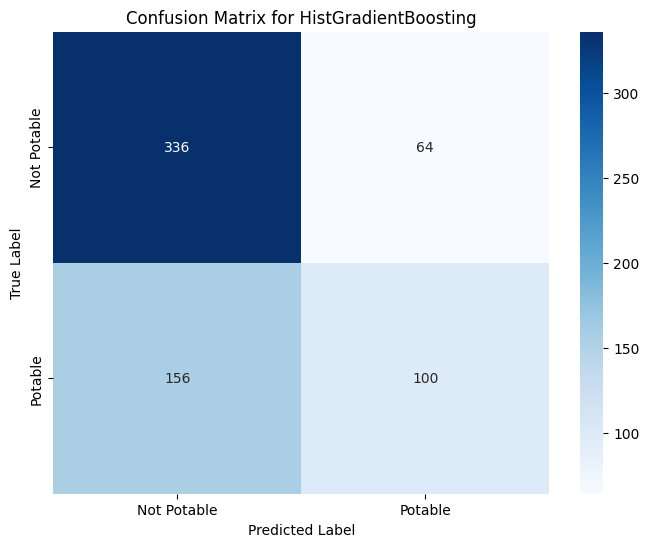


📝 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       400
           1       0.61      0.39      0.48       256

    accuracy                           0.66       656
   macro avg       0.65      0.62      0.61       656
weighted avg       0.65      0.66      0.65       656



In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import (RandomForestClassifier, 
                            GradientBoostingClassifier, 
                            HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, roc_auc_score, 
                           classification_report, confusion_matrix,
                           precision_score, recall_score, f1_score)

results_dir = Path("./results")
results_dir.mkdir(exist_ok=True, parents=True)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))
        
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, proba),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1': f1_score(y_test, y_pred, zero_division=0),
            'Fit Success': True
        }
        
        if hasattr(model, 'feature_importances_'):
            feature_imp = pd.Series(model.feature_importances_, index=X_train.columns)
            metrics['Top Feature'] = feature_imp.idxmax()
            
        return metrics
        
    except Exception as e:
        print(f"⚠️ Error in {model.__class__.__name__}: {str(e)}")
        return {
            'Accuracy': np.nan,
            'ROC AUC': np.nan,
            'Precision': np.nan,
            'Recall': np.nan,
            'F1': np.nan,
            'Top Feature': np.nan,
            'Fit Success': False
        }

results = {}
print("🚀 Starting model evaluation...\n")
for name, model in models.items():
    print(f"🔍 Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    if results[name]['Fit Success']:
        print(f"✅ {name} completed successfully")
        print(f"   Accuracy: {results[name]['Accuracy']:.3f}, ROC AUC: {results[name]['ROC AUC']:.3f}")
        if 'Top Feature' in results[name]:
            print(f"   Most important feature: {results[name]['Top Feature']}")
    else:
        print(f"❌ {name} encountered issues")
    print("-" * 50)

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.drop('Fit Success', axis=1)

print("\n📊 Model Performance Summary:")

numeric_cols = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1']
styled_results = results_df.style\
    .background_gradient(cmap='YlGnBu', subset=['Accuracy', 'ROC AUC'])\
    .background_gradient(cmap='YlOrRd', subset=['Precision', 'Recall', 'F1'])\
    .format("{:.3f}", subset=numeric_cols, na_rep="Failed")\
    .set_caption("Model Comparison Results")
display(styled_results)

results_path = results_dir / "model_comparison.csv"
results_df.to_csv(results_path)
print(f"\n💾 Results saved to: {results_path.resolve()}")

best_model_name = results_df['ROC AUC'].idxmax()
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} (ROC AUC: {results_df.loc[best_model_name]['ROC AUC']:.3f})")

y_pred = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

### Hyperparameter Tuning

🚀 Starting randomized search (faster than grid search)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Search completed!

📊 Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 25, 'bootstrap': False}
🏆 Best ROC AUC Score: 0.6775858140831237

🧪 Test Set Performance:
ROC AUC: 0.656
Accuracy: 0.671
F1 Score: 0.446


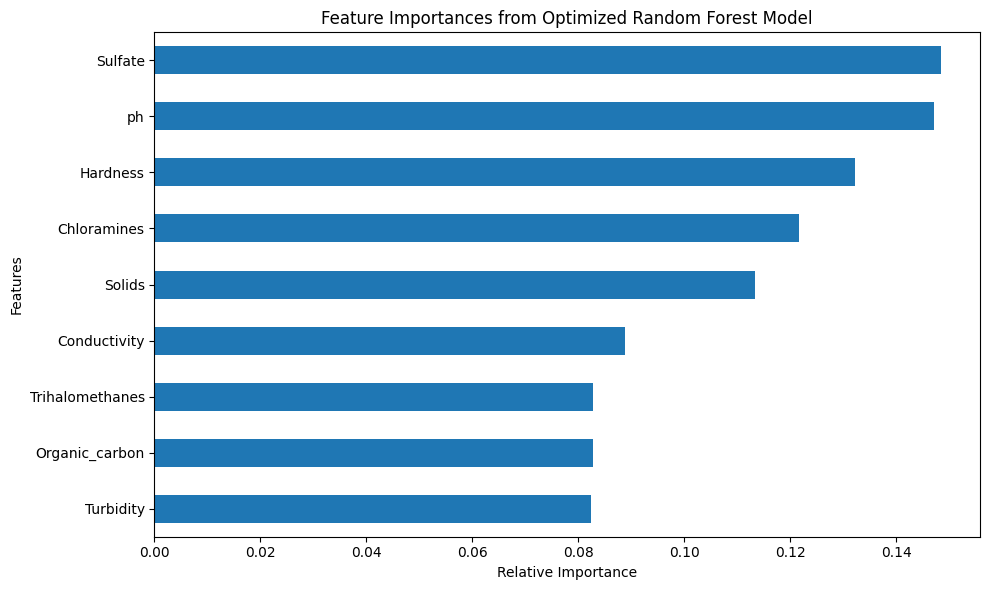

['best_random_forest_model.pkl']

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("🚀 Starting randomized search (faster than grid search)...")
random_search.fit(X_train, y_train)
print("✅ Search completed!")

print("\n📊 Best Parameters:", random_search.best_params_)
print("🏆 Best ROC AUC Score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\n🧪 Test Set Performance:")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Optimized Random Forest Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')

### Save Evaluated Model

In [28]:
import os
from pathlib import Path

models_dir = Path("./models")
models_dir.mkdir(exist_ok=True, parents=True)

model_path = models_dir / "best_random_forest_model.pkl"
joblib.dump(best_rf, model_path)
print(f"Model saved to: {model_path.resolve()}")

Model saved to: C:\Users\User\Downloads\models\best_random_forest_model.pkl


---

# Section 2

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push Generated/new files from this section to your Github Repo

* Git add .

In [ ]:
!git add .

* Git commit

In [ ]:
!git commit -m "Added Model_Experimentation notebook"

* Git push

In [ ]:
!git push origin main